In [1]:
import time
import numpy as np
import matplotlib.pylab as plt
from nyu_finger import NYUFingerReal
from IPython.display import display, clear_output

np.set_printoptions(suppress=True, precision=3)

In [2]:
robot = NYUFingerReal()
robot.initialize('enp5s0f1')

In [3]:
P = 5.0
D = 0.05

des_pos = np.array([0.3, 0.3, 0.3])
des_vel = np.array([0., 0., 0.])

traj_des_pos = np.zeros((10000, 3))
traj_pos = np.zeros((10000, 3))

i = 0

try:
    start = time.time()
    while True:
        t = time.time()
        des_pos[:] = 0.3 * (np.sin(10 * t) + 1.)
        des_vel[:] = 0.3 * np.cos(10 * t) * 10.
        
        q, v = robot.get_state()
        
        # Recording
        traj_des_pos[i] = des_pos
        traj_pos[i] = q

        tau = P * (des_pos - q) + D * (des_vel - v)

        robot.send_joint_torque(tau)
        
        robot.step()
        i += 1
except KeyboardInterrupt:
    print('interrupted!')

end = time.time()
    
    
# Need to send zero torques. Otherwise the safety mode on the card kicks in
# and the card goes into error mode.
robot.send_target_joint_torque(np.array([0., 0., 0.]))

IndexError: index 10000 is out of bounds for axis 0 with size 10000

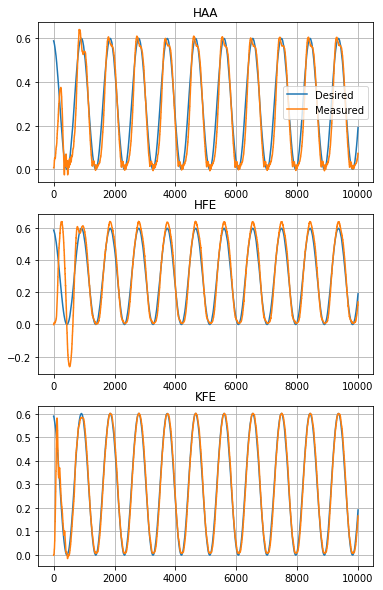

In [4]:
fig, axes = plt.subplots(3, 1, figsize=(6, 10))

for i, (ax, label) in enumerate(zip(axes, ['HAA', 'HFE', 'KFE'])):
    ax.plot(traj_des_pos[:, i], label='Desired')
    ax.plot(traj_pos[:, i], label='Measured')
    ax.grid(True)
    ax.set_title(label)
    
axes[0].legend()